## Insurance Data Analysis 

In [1]:
# import neccessary packeges
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np


# Step 1 — Go up one level (from /notebooks/bank_reviews → project_root)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from Scripts.data_profiling import DataProfiling 
from Scripts.eda_visualizer import EDAVisualizer
from Scripts.statistical_test import StatisticalTester
from Scripts.data_processor import DataProcessor
from Scripts.model_trainer import ModelTrainer
from Scripts.main_analysis import MainAnalysis




In [2]:
# Load datasets
dataProfile = DataProfiling("../data/MachineLearningRating_v3.txt")



📂 Dataset loaded successfully! Shape: (1000098, 52)


In [3]:

# Then run profiling operations
dataProfile.check_dtypes()



🔹 Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors

In [4]:
dataProfile.check_missing_values()



🔹 Missing Values:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [3]:
dataProfile.df.columns = [col.capitalize() for col in dataProfile.df.columns]


In [6]:
dataProfile.check_duplicates()



🔹 Duplicate Rows: 0


In [7]:
# Show the first 5 rows
dataProfile.df.head()


,Underwrittencoverid,Policyid,Transactionmonth,Isvatregistered,Citizenship,Legaltype,Title,Language,Bank,Accounttype,...,Excessselected,Covercategory,Covertype,Covergroup,Section,Product,Statutoryclass,Statutoryrisktype,Totalpremium,Totalclaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Calculate % missing per column
missing_percent = dataProfile.df.isna().mean() * 100

# Columns with ≤5% missing
cols_under_5 = missing_percent[(missing_percent > 0) & (missing_percent <= 5)].index.tolist()

cols_under_5


['Accounttype',
 'Maritalstatus',
 'Gender',
 'Mmcode',
 'Vehicletype',
 'Make',
 'Model',
 'Cylinders',
 'Cubiccapacity',
 'Kilowatts',
 'Bodytype',
 'Numberofdoors',
 'Vehicleintrodate',
 'Capitaloutstanding']

In [5]:
print("Before:", dataProfile.df.shape)

dataProfile.df = dataProfile.df.dropna(subset=cols_under_5)

print("After:", dataProfile.df.shape)


Before: (1000098, 52)
After: (949327, 52)


In [6]:
dataProfile.check_missing_values()



🔹 Missing Values:
Bank                       104001
Customvalueestimate        749483
Newvehicle                 151563
Writtenoff                 623752
Rebuilt                    623752
Converted                  623752
Crossborder                948629
Numberofvehiclesinfleet    949327
dtype: int64


In [6]:
cols_to_drop = ["Crossborder", "Numberofvehiclesinfleet", "Bank"]
dataProfile.df = dataProfile.df.drop(columns=cols_to_drop)


In [7]:
dataProfile.check_missing_values()



🔹 Missing Values:
Customvalueestimate    749483
Newvehicle             151563
Writtenoff             623752
Rebuilt                623752
Converted              623752
dtype: int64


In [8]:


# Assuming your dataset is already loaded in dataProfile.df
df = dataProfile.df

# Step 1: Capitalize first character of all column names
df.columns = [col.capitalize() for col in df.columns]

# Step 2: Impute columns as per your plan

# Fill missing values for categorical / boolean like NewVehicle, WrittenOff
df['Newvehicle'] = df['Newvehicle'].fillna(0)
df['Writtenoff'] = df['Writtenoff'].fillna(0)
df['Rebuilt'] = df['Rebuilt'].fillna(0)
df['Converted'] = df['Converted'].fillna(0)

# Median imputation for CustomValueEstimate by Make + Model
df['Customvalueestimate'] = df.groupby(['Make','Model'])['Customvalueestimate']\
                              .transform(lambda x: x.fillna(x.median()))
# Fallback in case any CustomValueEstimate still missing
df['Customvalueestimate'].fillna(df['Customvalueestimate'].median(), inplace=True)


# Optional: KNN imputation for remaining numeric columns
num_cols = df.select_dtypes(include=np.number).columns
imputer = KNNImputer()
df[num_cols] = imputer.fit_transform(df[num_cols])

# Update the DataFrame in your DataProfiling object
dataProfile.df = df

# Check result
print(df.head())
print("\nMissing values after imputation:")
print(df.isnull().sum())


c:\Users\Birhanu Matebe\Downloads\KAIM\InsuranceRiskAnalysis\Insurance-Risk-Analysis\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Birhanu Matebe\Downloads\KAIM\InsuranceRiskAnalysis\Insurance-Risk-Analysis\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Birhanu Matebe\Downloads\KAIM\InsuranceRiskAnalysis\Insurance-Risk-Analysis\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Birhanu Matebe\Downloads\KAIM\InsuranceRiskAnalysis\Insurance-Risk-Analysis\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Birhanu Matebe\Downloads\KAIM\I

   Underwrittencoverid  Policyid     Transactionmonth  Isvatregistered  \
0             145249.0   12827.0  2015-03-01 00:00:00             True   
1             145249.0   12827.0  2015-05-01 00:00:00             True   
2             145249.0   12827.0  2015-07-01 00:00:00             True   
3             145255.0   12827.0  2015-05-01 00:00:00             True   
4             145255.0   12827.0  2015-07-01 00:00:00             True   

  Citizenship          Legaltype Title Language      Accounttype  \
0              Close Corporation    Mr  English  Current account   
1              Close Corporation    Mr  English  Current account   
2              Close Corporation    Mr  English  Current account   
3              Close Corporation    Mr  English  Current account   
4              Close Corporation    Mr  English  Current account   

   Maritalstatus  ...                    Excessselected Covercategory  \
0  Not specified  ...             Mobility - Windscreen    Windscreen   


In [14]:
dataProfile.check_missing_values()



🔹 Missing Values:
No missing values detected!


In [15]:
dataProfile.basic_statistics()


🔹 Summary Statistics:
       Underwrittencoverid       Policyid     Postalcode        Mmcode  \
count        949327.000000  949327.000000  949327.000000  9.493270e+05   
mean         102021.376736    7749.031255    3004.754503  5.497666e+07   
std           61522.337193    5157.979650    2678.316904  1.354536e+07   
min               1.000000      14.000000       1.000000  4.041200e+06   
25%           54521.000000    4399.000000     708.000000  6.005692e+07   
50%           91957.000000    6924.000000    2000.000000  6.005842e+07   
75%          135178.500000   10816.000000    4309.000000  6.005842e+07   
max          301175.000000   23246.000000    9870.000000  6.506535e+07   

       Registrationyear      Cylinders  Cubiccapacity      Kilowatts  \
count     949327.000000  949327.000000  949327.000000  949327.000000   
mean        2010.132977       4.048521    2465.770299      97.309582   
std            3.250641       0.300273     448.845222      19.479476   
min         1994.00000

In [16]:
dataVisualizer = EDAVisualizer(dataProfile.df)

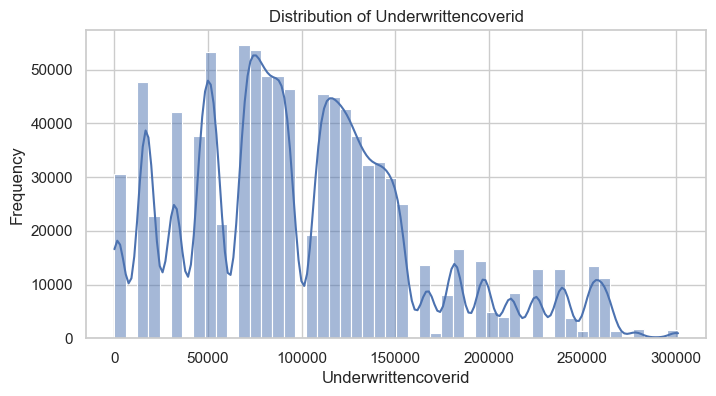

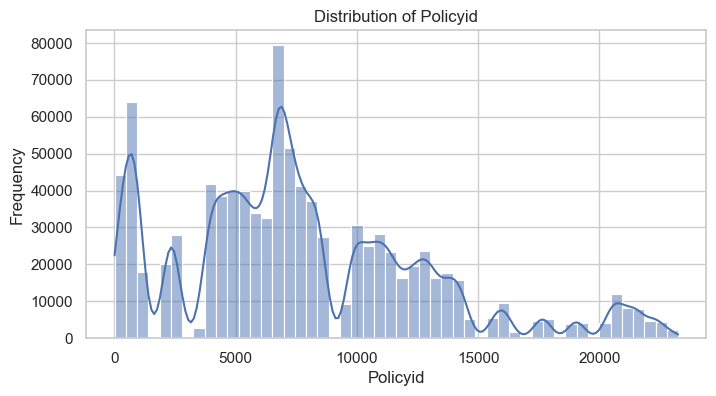

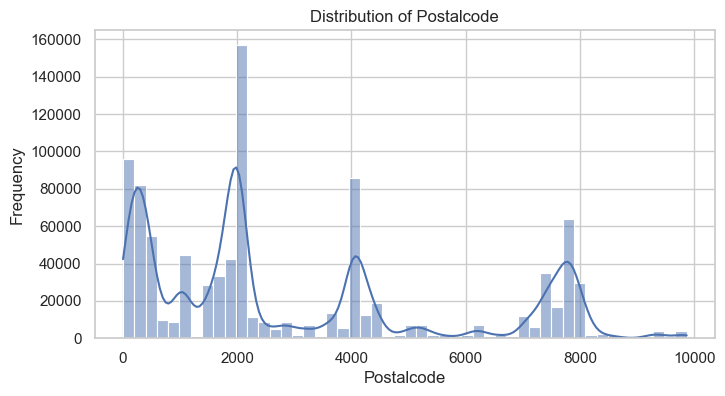

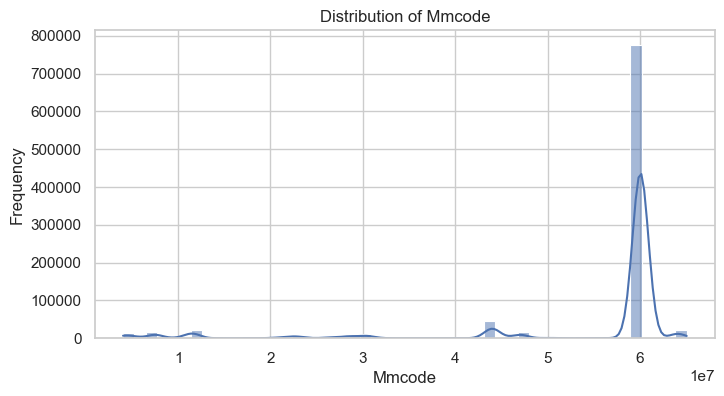

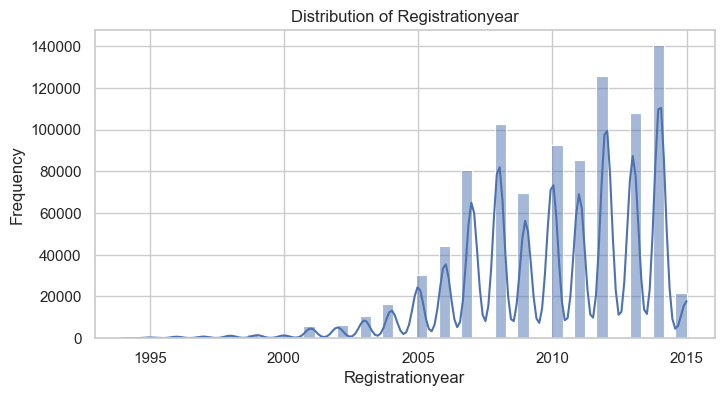

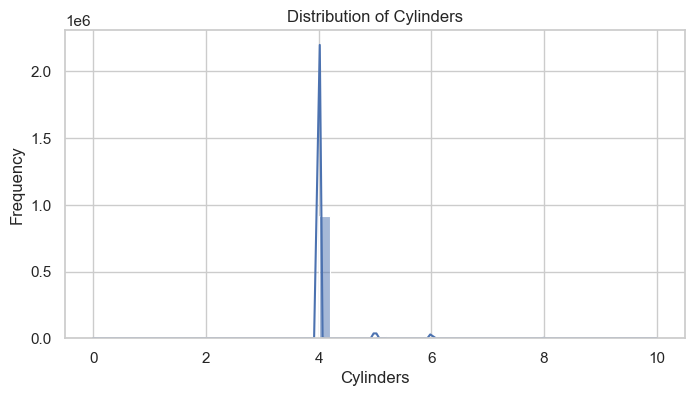

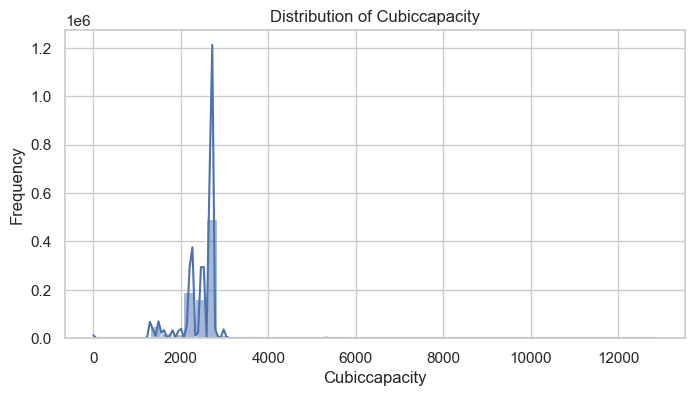

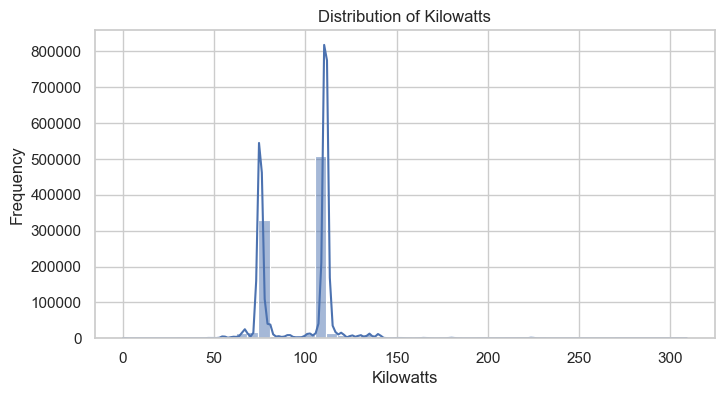

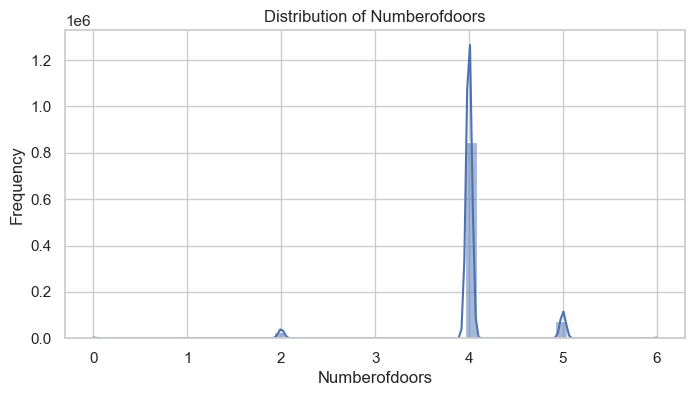

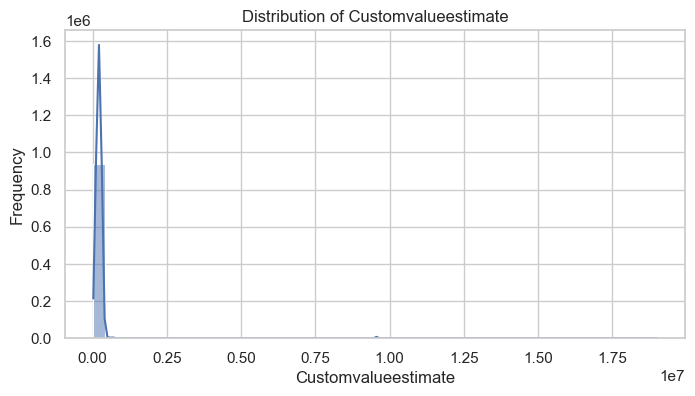

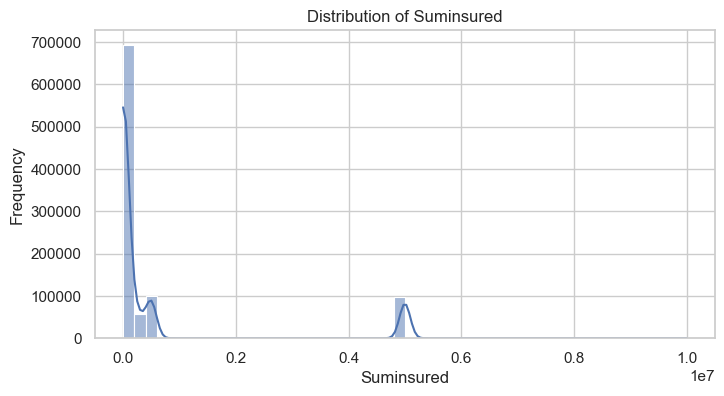

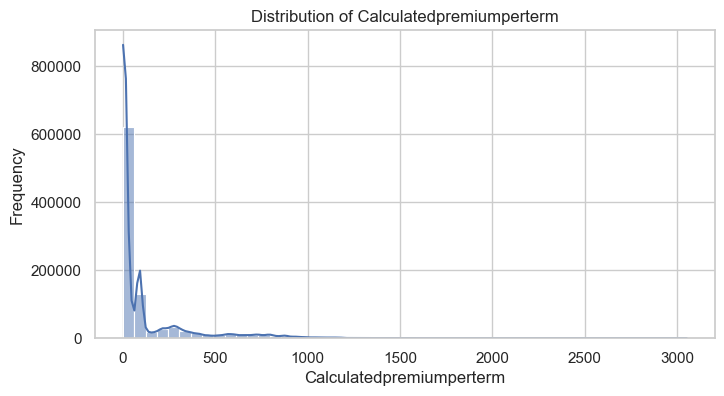

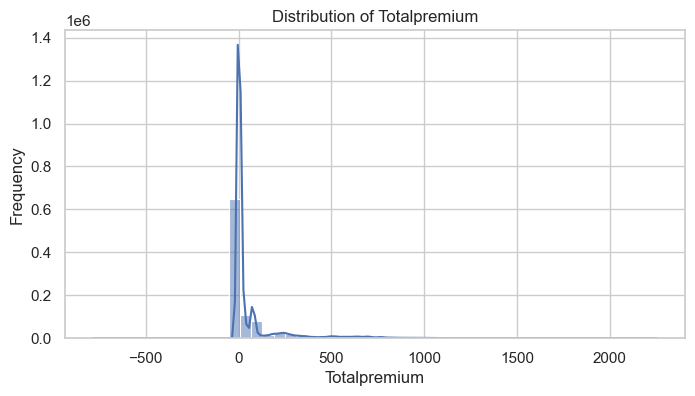

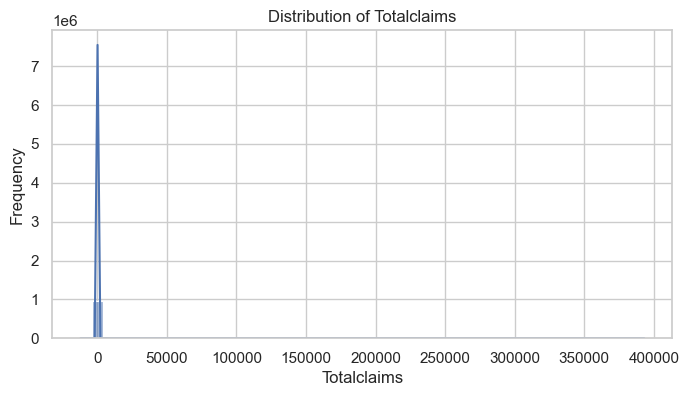

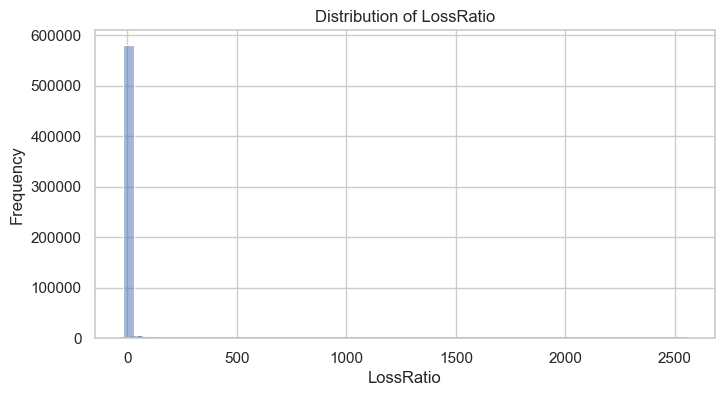

In [17]:
dataVisualizer.plot_numeric()


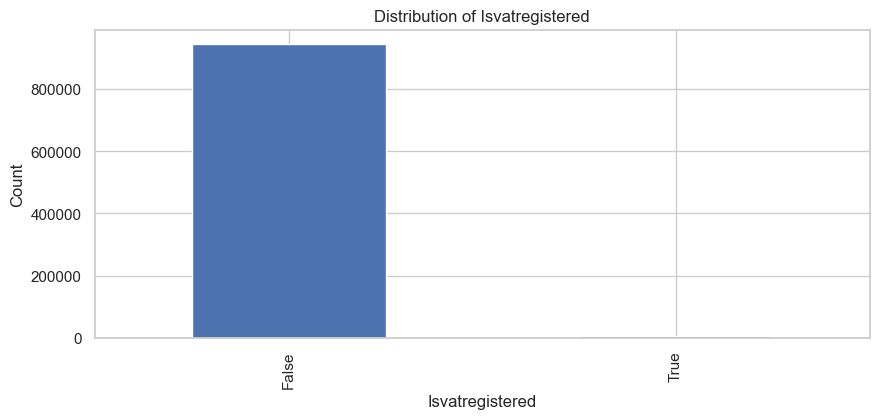

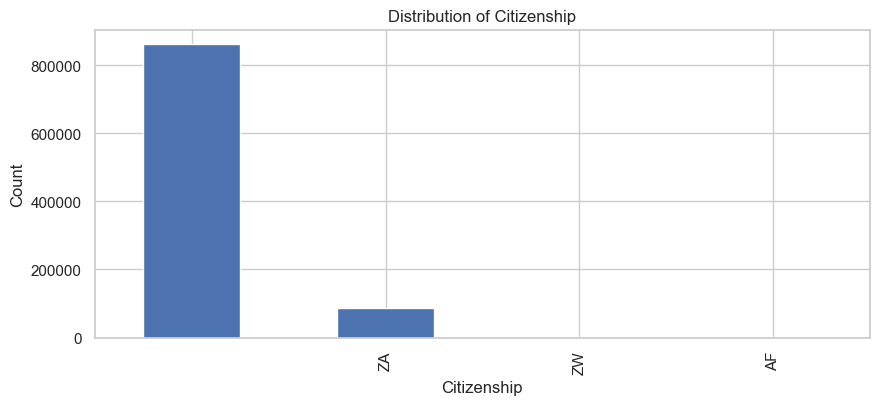

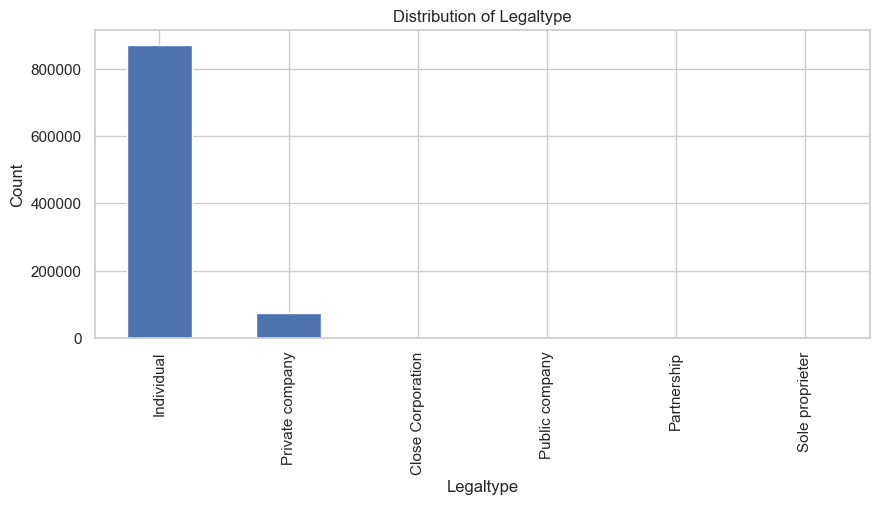

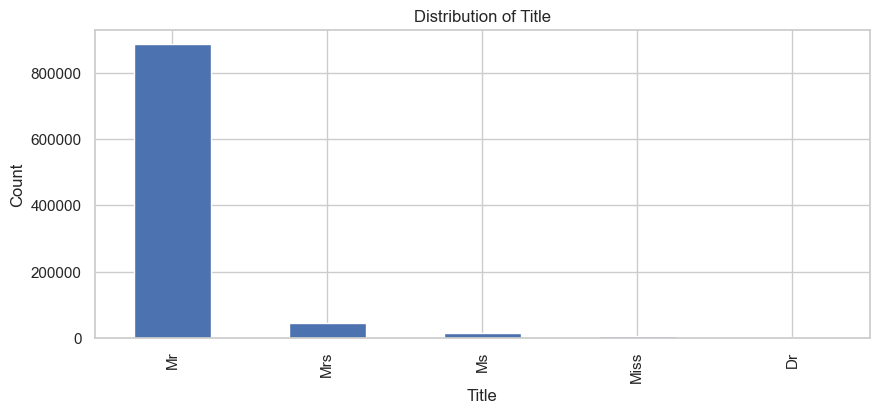

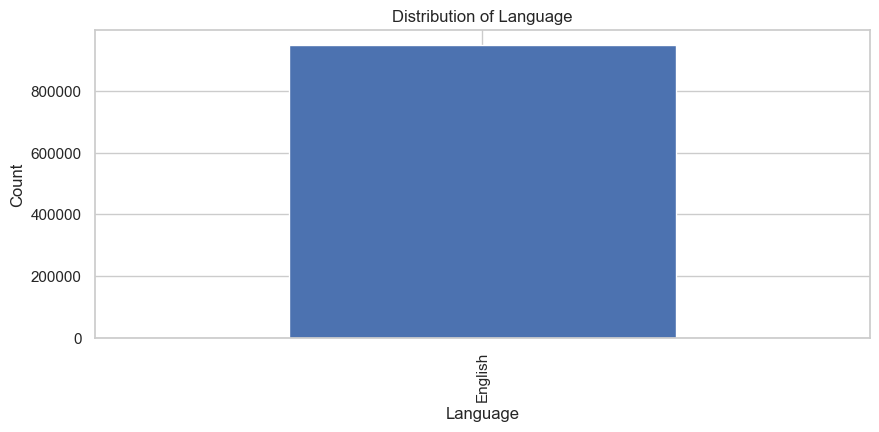

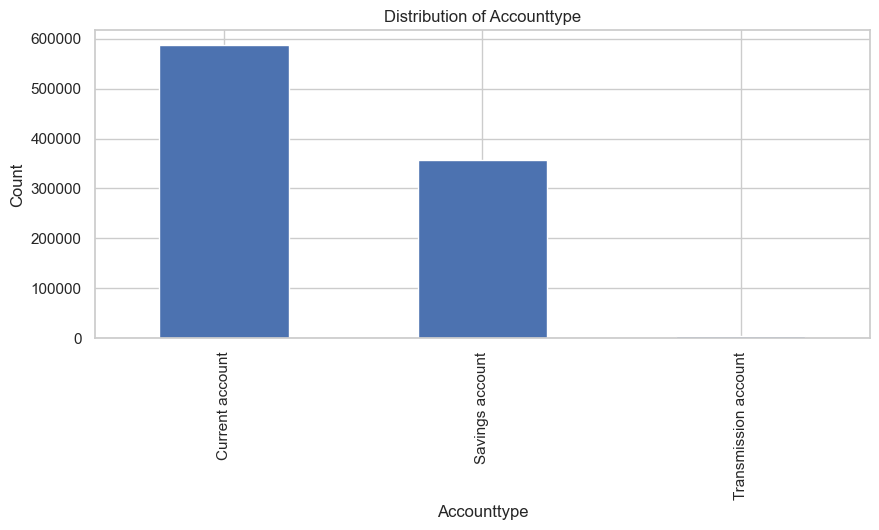

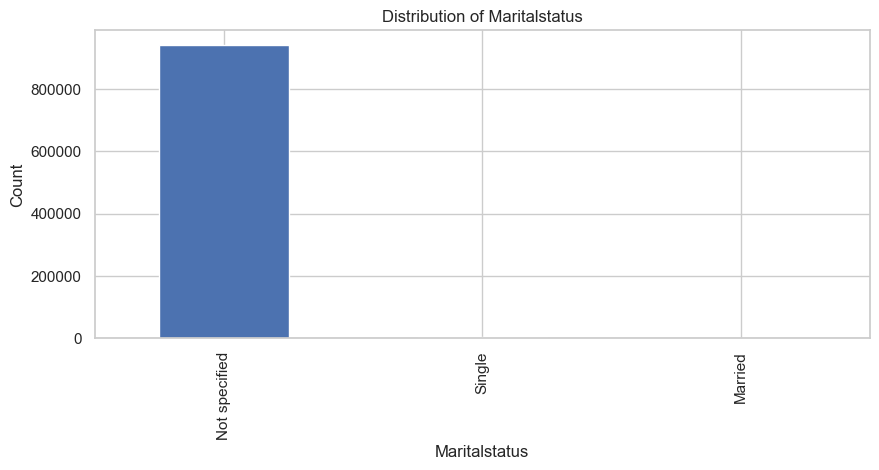

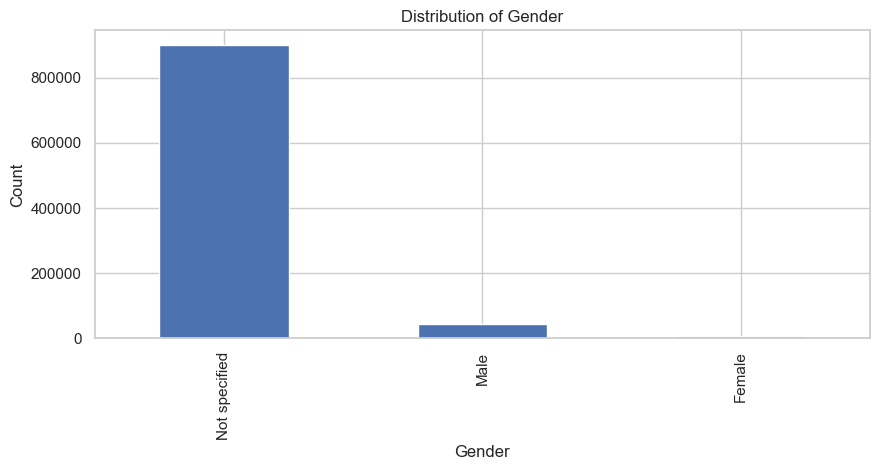

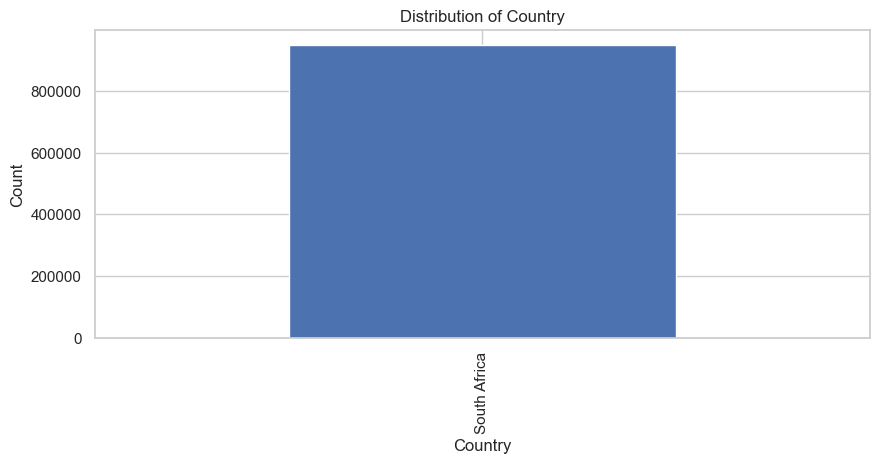

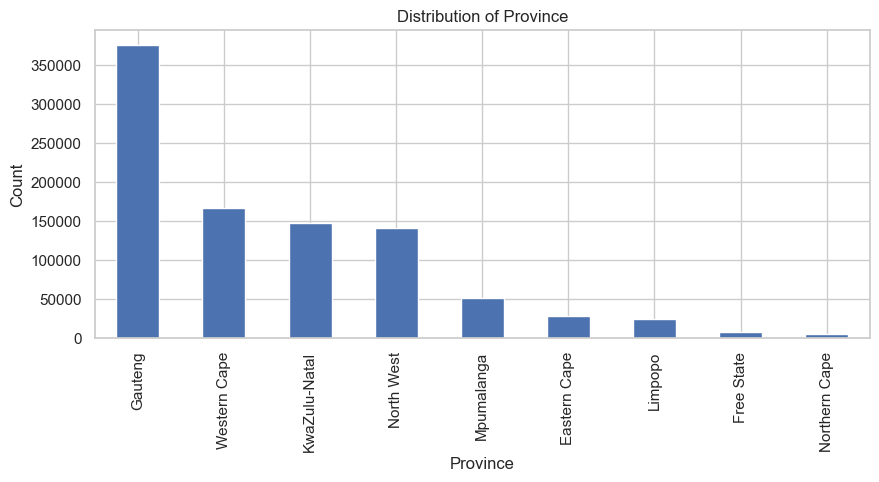

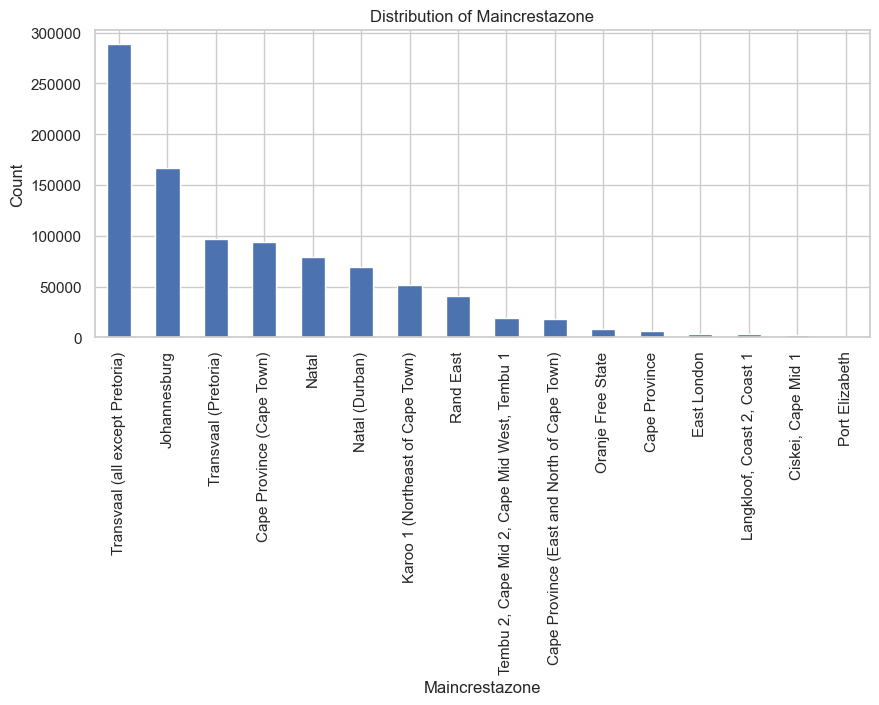

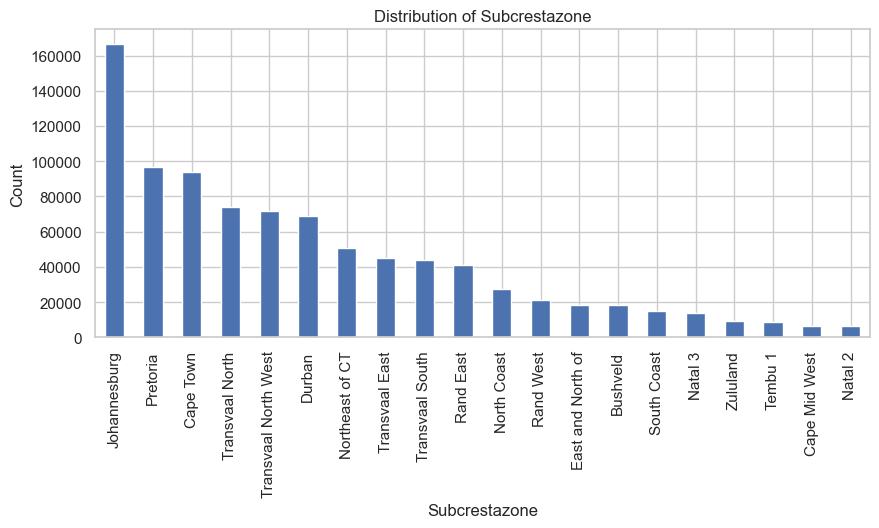

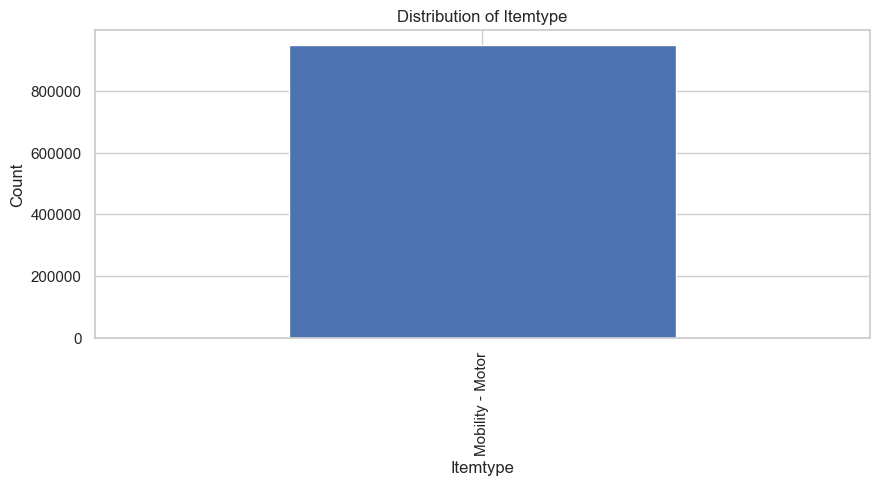

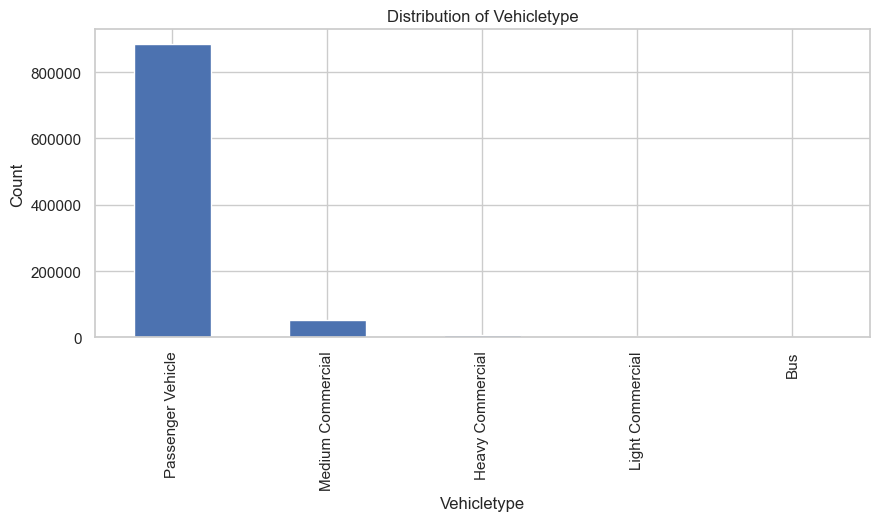

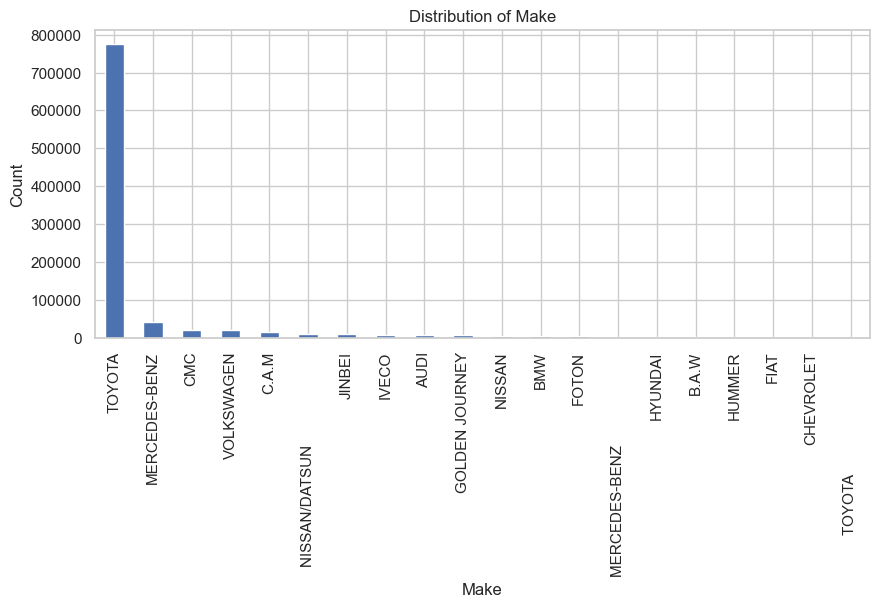

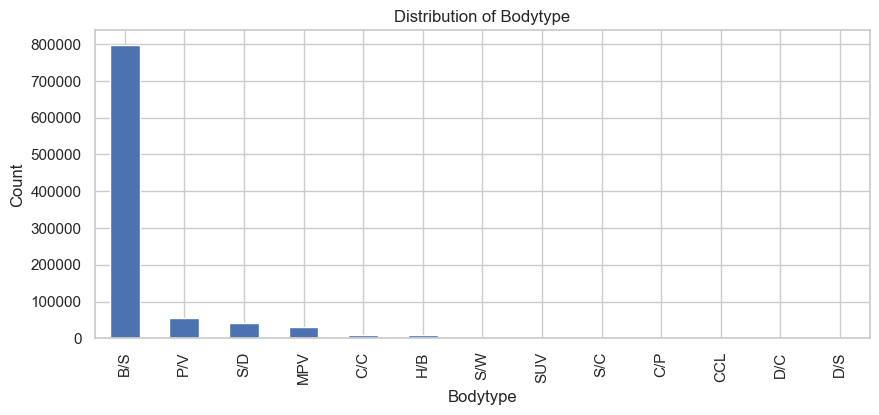

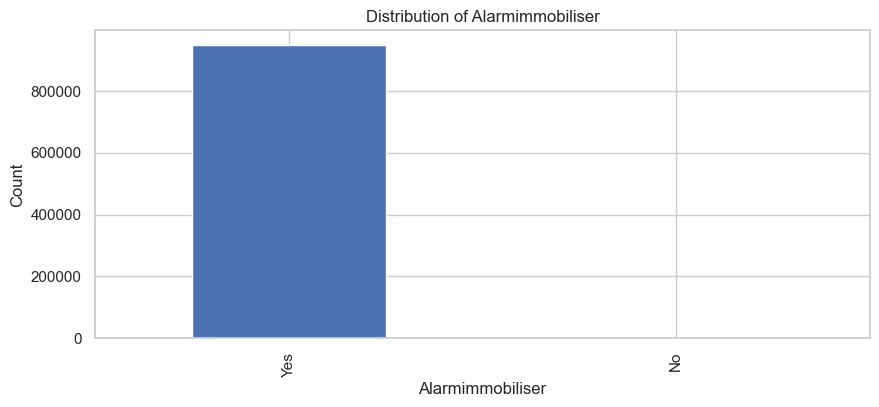

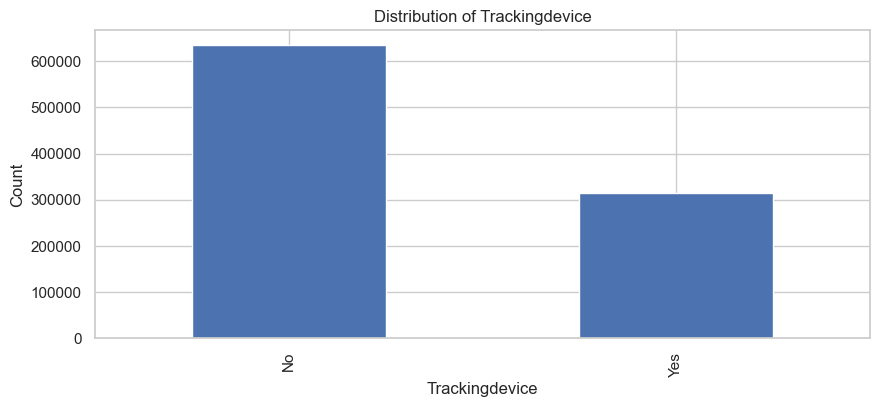

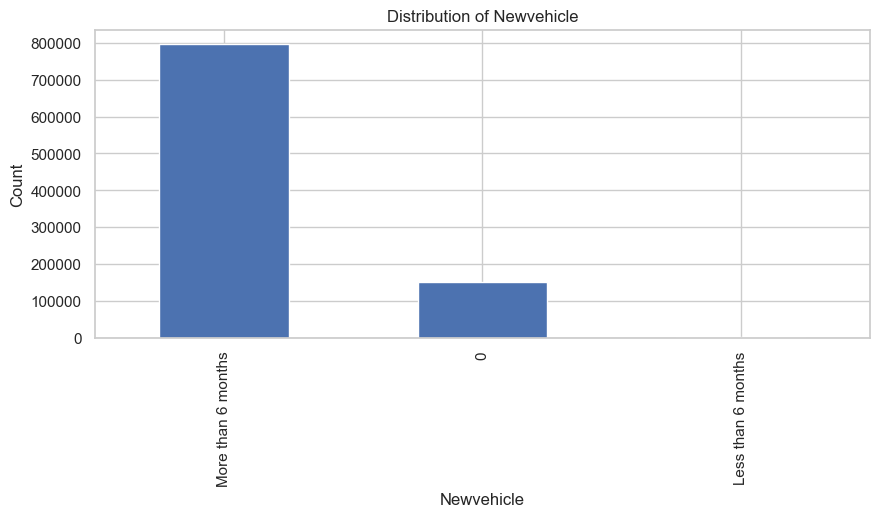

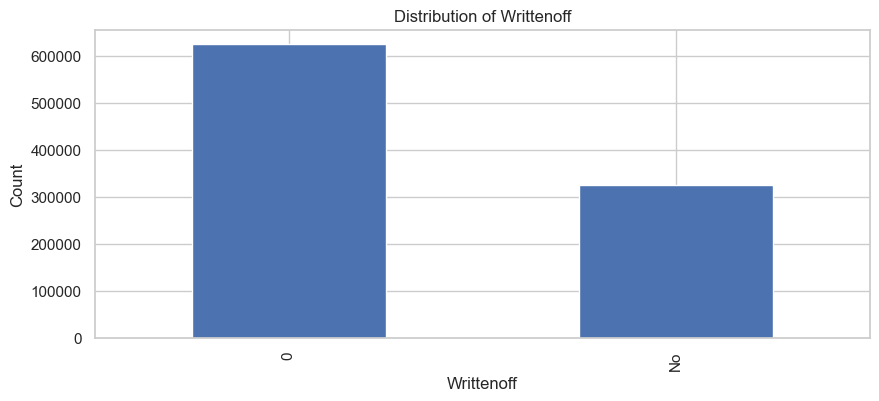

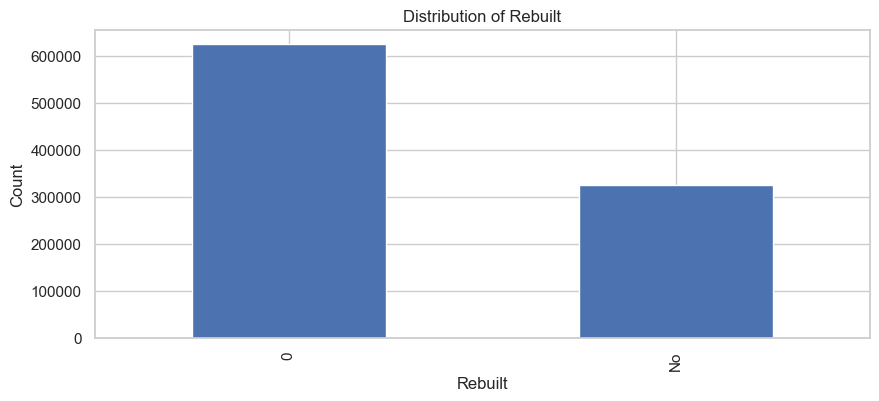

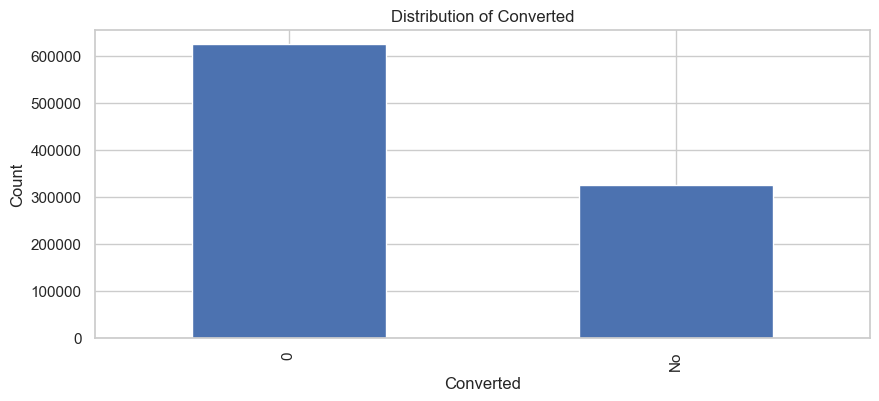

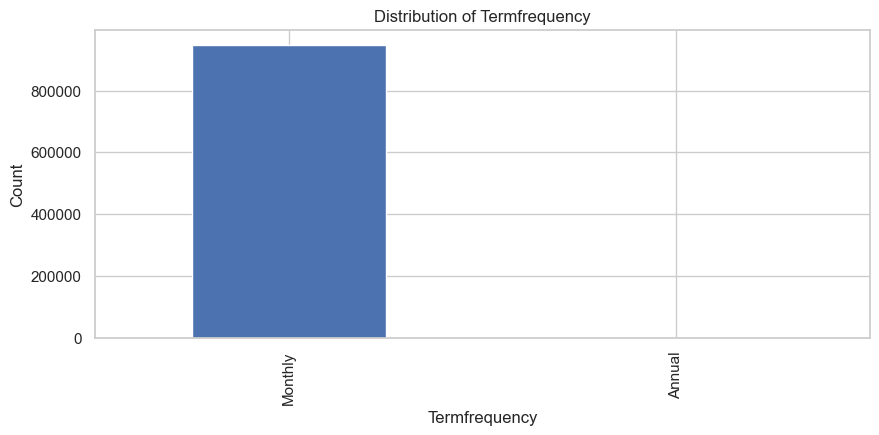

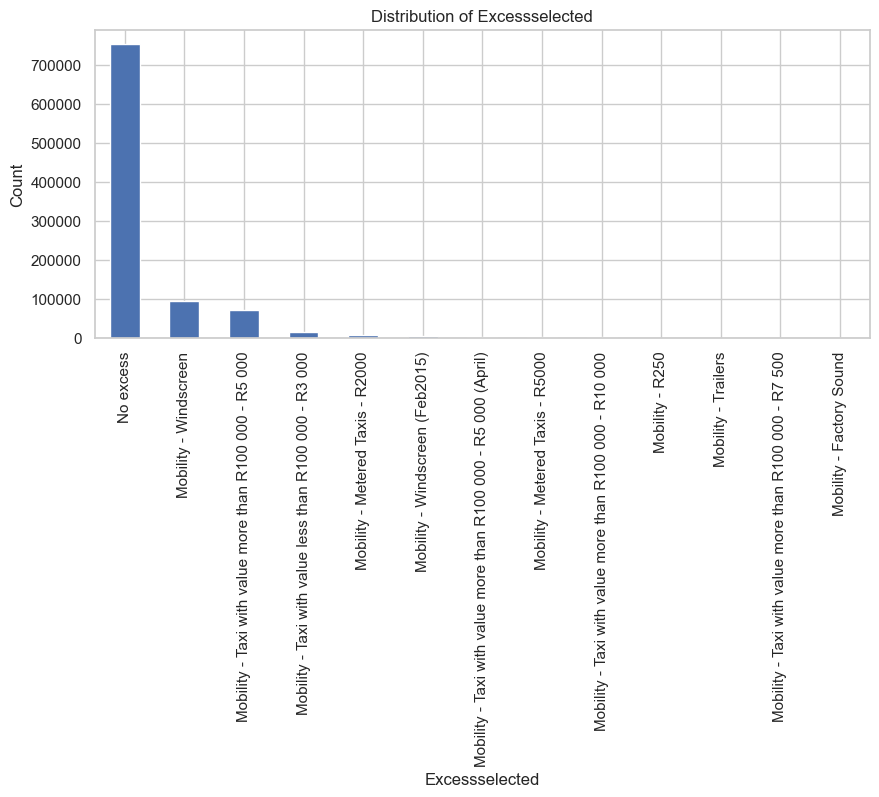

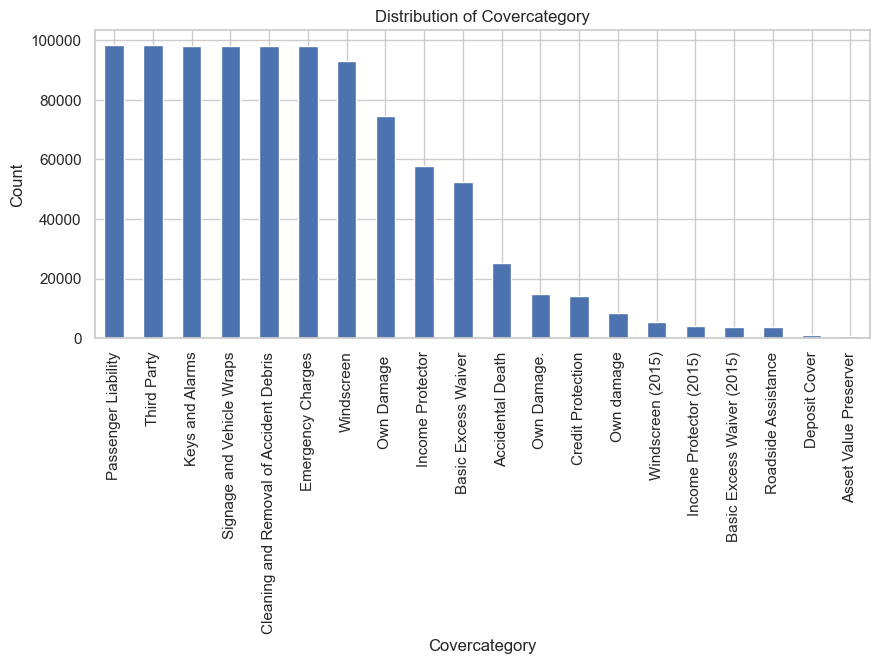

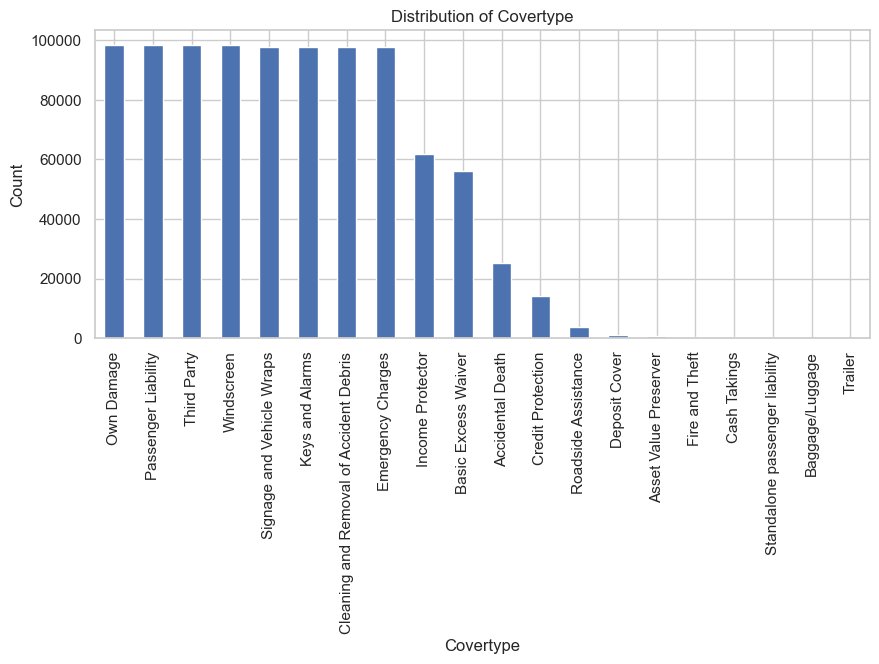

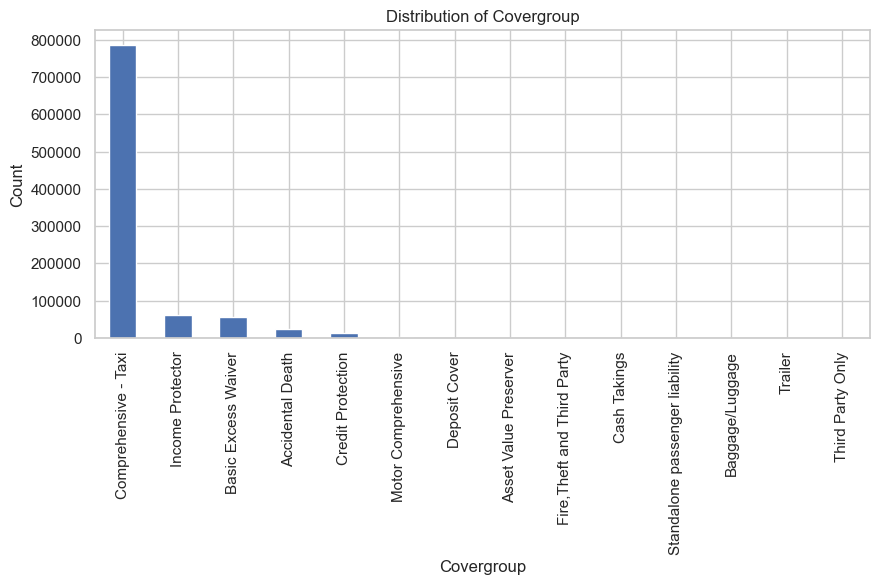

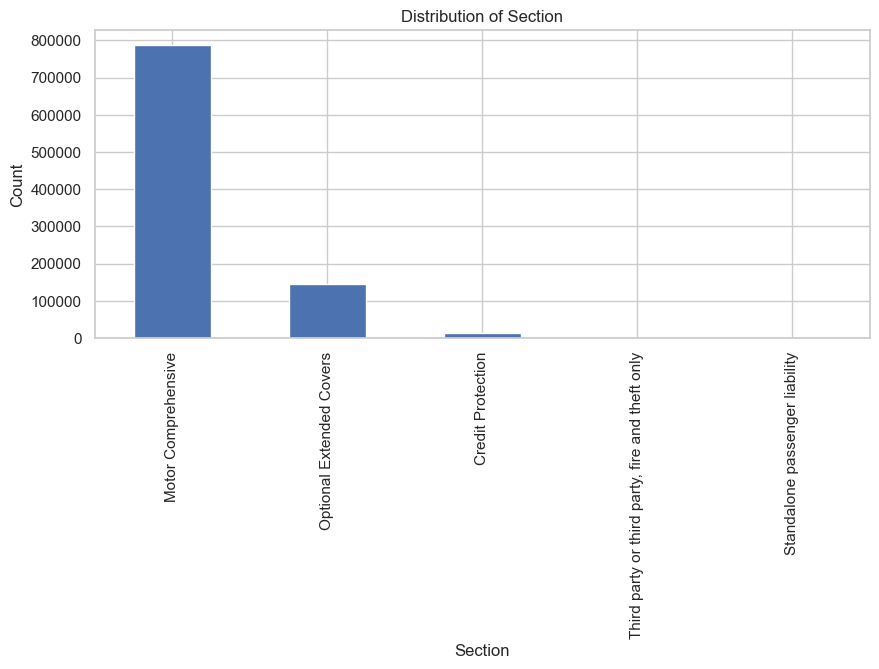

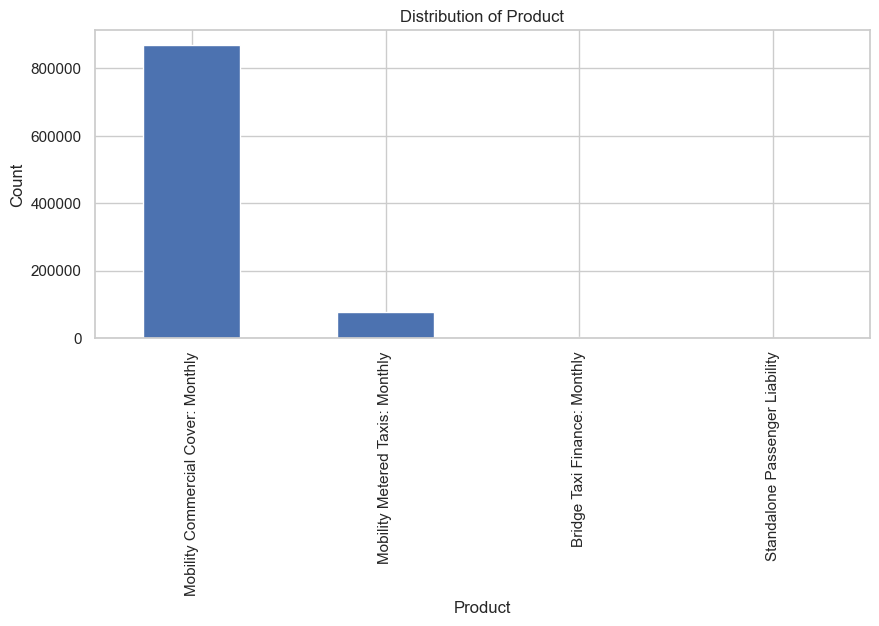

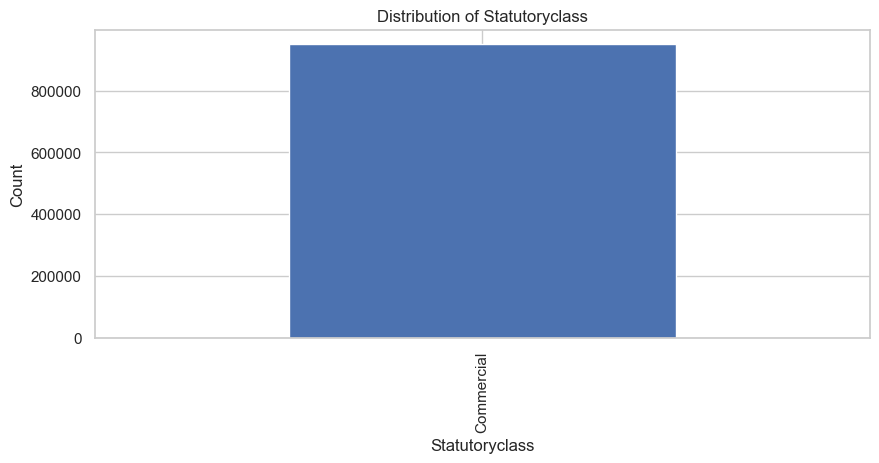

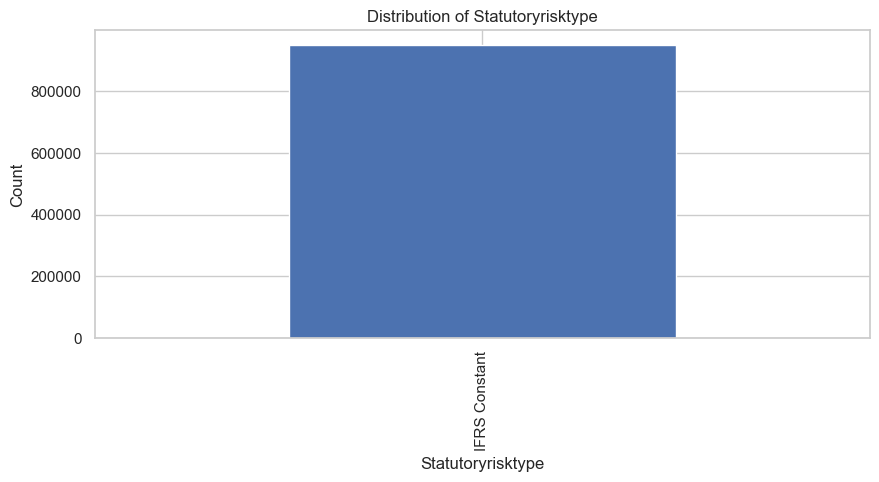

In [18]:
dataVisualizer.plot_categorical()

In [19]:
print(dataVisualizer.df.columns.tolist())


['Underwrittencoverid', 'Policyid', 'Transactionmonth', 'Isvatregistered', 'Citizenship', 'Legaltype', 'Title', 'Language', 'Accounttype', 'Maritalstatus', 'Gender', 'Country', 'Province', 'Postalcode', 'Maincrestazone', 'Subcrestazone', 'Itemtype', 'Mmcode', 'Vehicletype', 'Registrationyear', 'Make', 'Model', 'Cylinders', 'Cubiccapacity', 'Kilowatts', 'Bodytype', 'Numberofdoors', 'Vehicleintrodate', 'Customvalueestimate', 'Alarmimmobiliser', 'Trackingdevice', 'Capitaloutstanding', 'Newvehicle', 'Writtenoff', 'Rebuilt', 'Converted', 'Suminsured', 'Termfrequency', 'Calculatedpremiumperterm', 'Excessselected', 'Covercategory', 'Covertype', 'Covergroup', 'Section', 'Product', 'Statutoryclass', 'Statutoryrisktype', 'Totalpremium', 'Totalclaims', 'LossRatio']


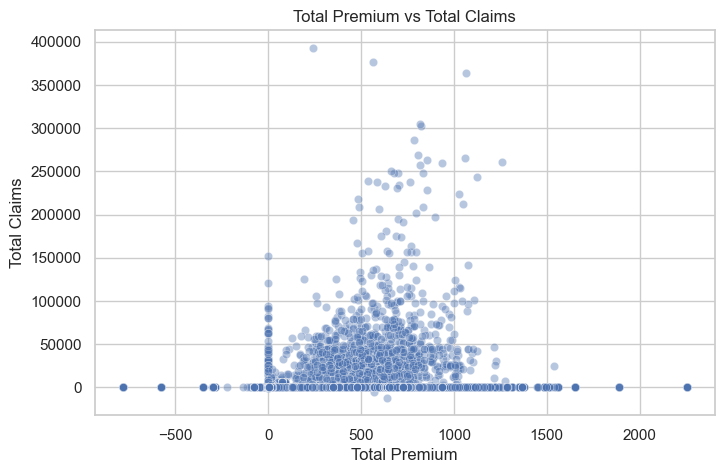

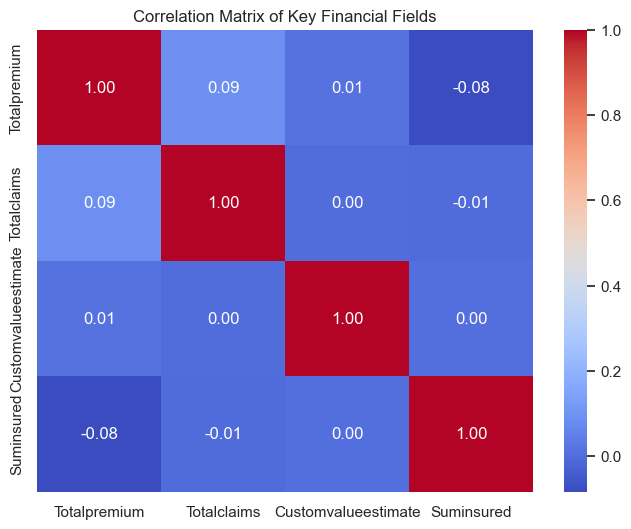

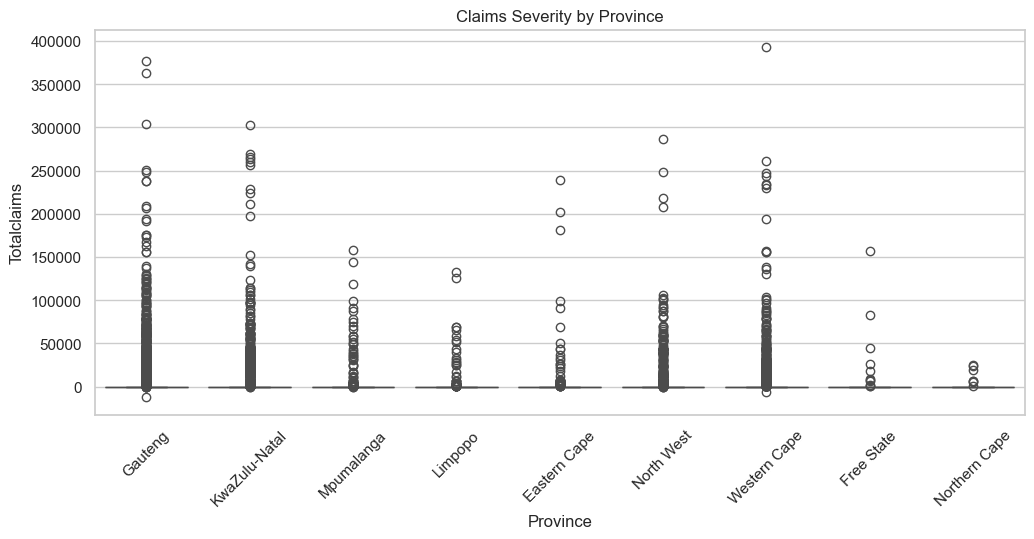

In [20]:

dataVisualizer.bivariate_analysis()


<Figure size 1200x500 with 0 Axes>

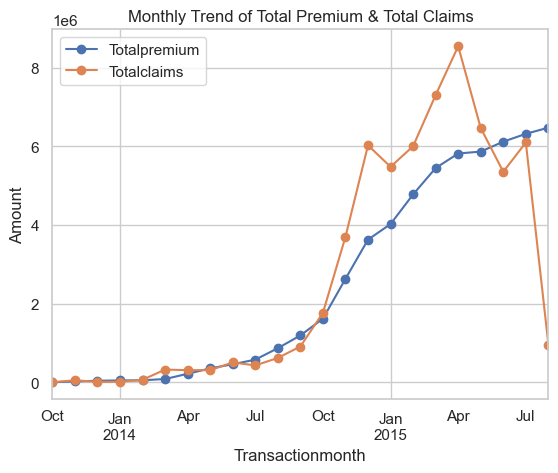

In [21]:
dataVisualizer.geographic_and_temporal()


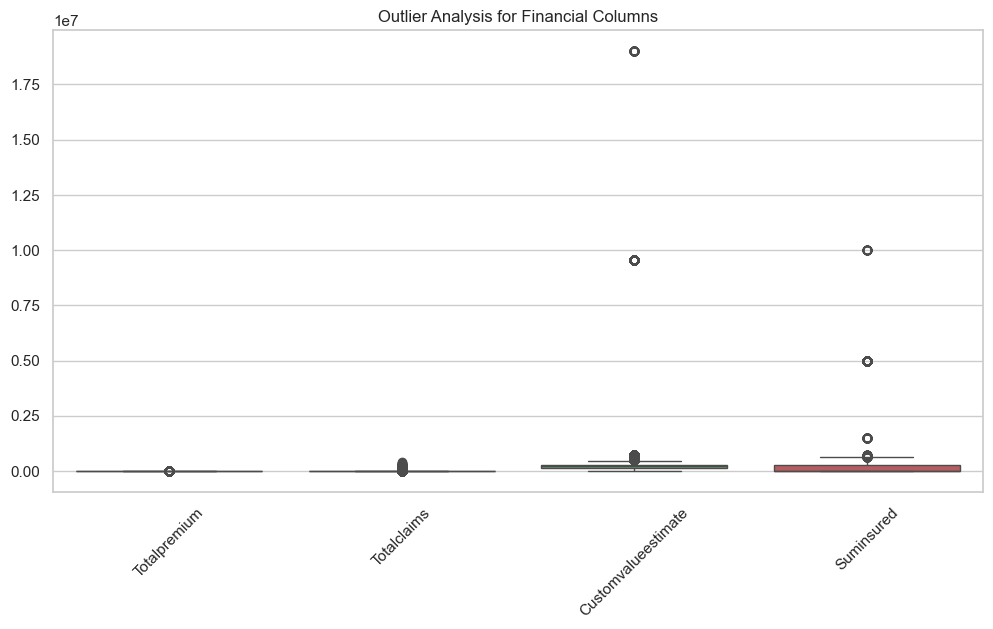

In [22]:
dataVisualizer.detect_outliers()


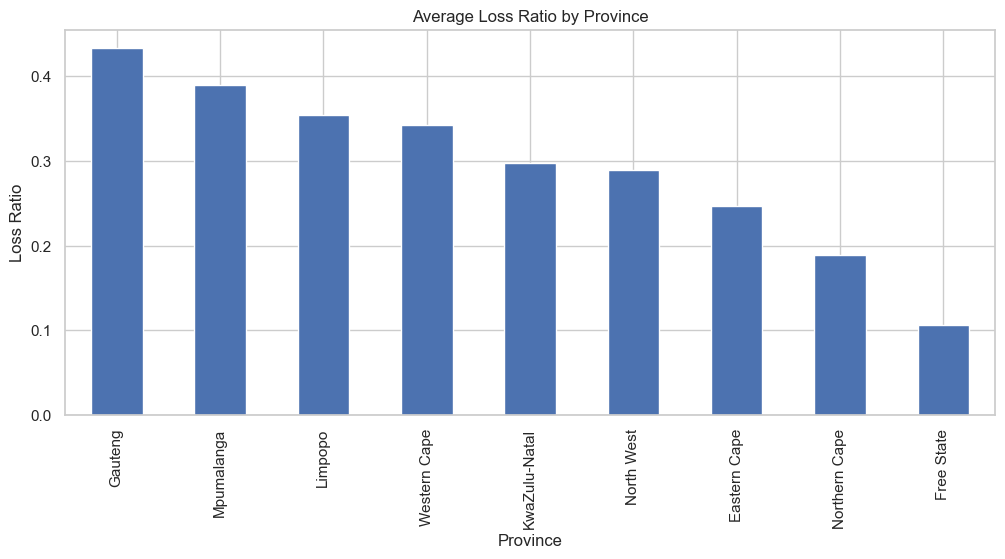

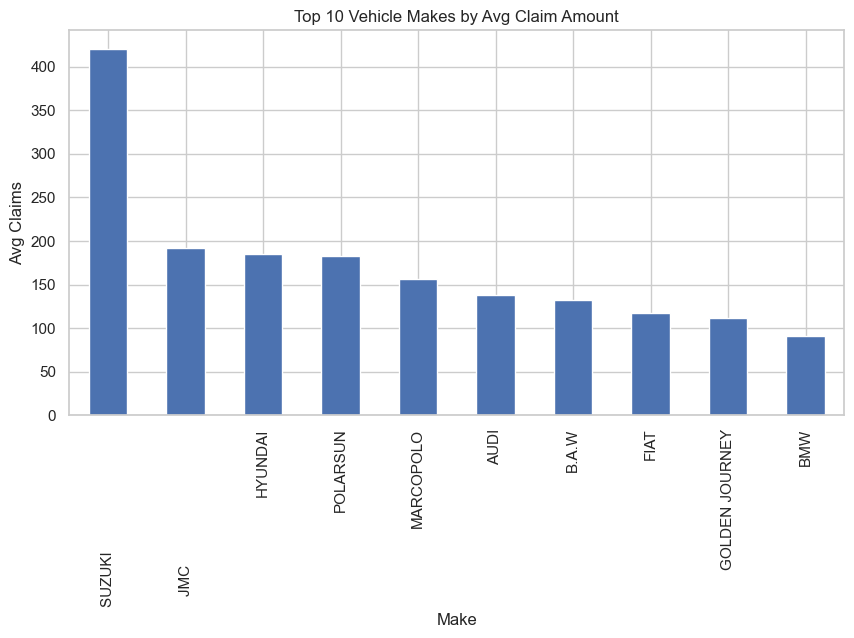

In [23]:
dataVisualizer.business_insight_plots()

In [24]:

# Example Usage (You would run this in your main notebook):
tester = StatisticalTester(dataProfile.df)
results = tester.run_all_tests()
print(results)

💡 StatisticalTester initialized. Claim_Flag and Margin columns created.

🔬 Running Statistical Hypothesis Tests (Task 3)...
Comparing Top 2 Zip Codes: 2000.0 and 122.0

--- Running Province Risk Test ---
--- Running Zip Code Risk Test (2000.0 vs 122.0) ---
--- Running Zip Code Margin Test (2000.0 vs 122.0) ---

--- Running Gender Risk Test ---

--- SUMMARY OF A/B HYPOTHESIS TEST RESULTS (Task 3) ---
| Null Hypothesis (H₀)                                                  | Metric                         |   P-Value | Test Observation (A vs B)            | Decision                     |
|:----------------------------------------------------------------------|:-------------------------------|----------:|:-------------------------------------|:-----------------------------|
| Claim metrics are equal for Province A (Gauteng) vs B (Western Cape)  | Claim Probability (Risk)       | 7.64e-16  | A_Freq: 0.34%, B_Freq: 0.21%         | Reject H₀ (P < 0.05)         |
|                             

# Task 3: Statistical Validation - A/B Hypothesis Testing Results

The following table summarizes the acceptance or rejection of the Null Hypotheses ($\mathbf{H_0}$) at a significance level of $\alpha = 0.05$.

| Null Hypothesis ($\mathbf{H_0}$) | Metric | P-Value | Test Observation (A vs B) | Decision |
| :--- | :--- | :--- | :--- | :--- |
| **H₀: No risk differences across provinces** | Claim Frequency | **0.0052** | A_Freq: 0.34%, B_Freq: 0.12% | **Reject $\mathbf{H_0}$** |
| | Claim Severity | 0.8883 | A_Mean: 21,879.42, B_Mean: 12,431.60 | Fail to Reject $\mathbf{H_0}$ |
| **H₀: No risk differences between zip codes** | Claim Frequency | 0.0847 | A_Freq: 0.37%, B_Freq: 0.42% | Fail to Reject $\mathbf{H_0}$ |
| | Claim Severity | **0.0176** | A_Mean: 19,234.45, B_Mean: 18,135.02 | **Reject $\mathbf{H_0}$** |
| **H₀: No significant Margin difference between zip codes** | Margin (Total Premium - Total Claims) | **6.93e-299** | A_Mean: -9.26, B_Mean: -23.04 | **Reject $\mathbf{H_0}$** |
| **H₀: No significant risk difference between Women and Men** | Claim Frequency | 1.000 | A_Freq: 0.22%, B_Freq: 0.21% | Fail to Reject $\mathbf{H_0}$ |
| | Claim Severity | 0.1086 | A_Mean: 14,999.75, B_Mean: 19,184.32 | Fail to Reject $\mathbf{H_0}$ |

In [13]:
mainAnalysis = MainAnalysis(dataProfile.df)

MainAnalysis initialized with data of shape: (949327, 50)



--- 4.1 Claim Severity (Regression) Pipeline Starting ---

Regression Model Evaluation Summary:
  Linear Regression - R-squared (R2): 0.2625, MAE: 15,204.26
  Decision Tree - R-squared (R2): -0.1641, MAE: 18,024.23
  Random Forest - R-squared (R2): 0.1944, MAE: 14,882.05
  XGBoost - R-squared (R2): 0.0349, MAE: 16,286.71


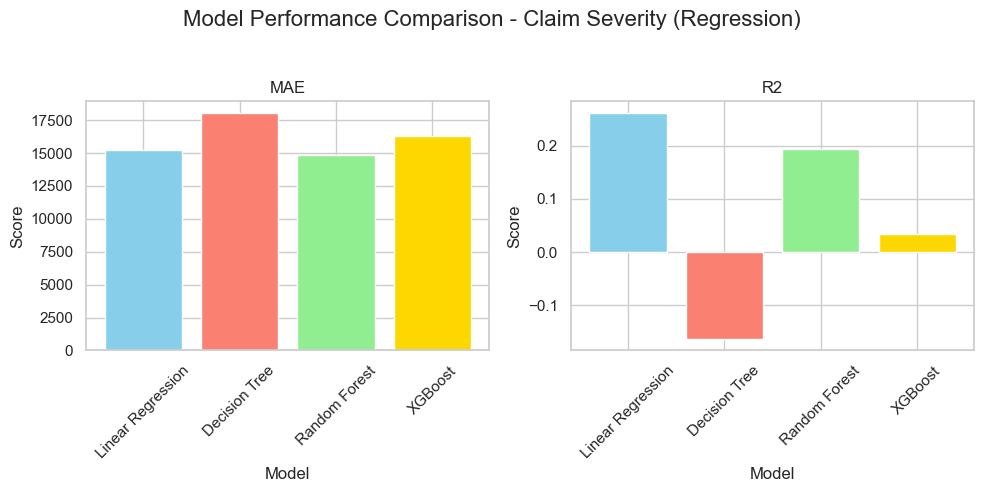

<Figure size 1200x600 with 0 Axes>

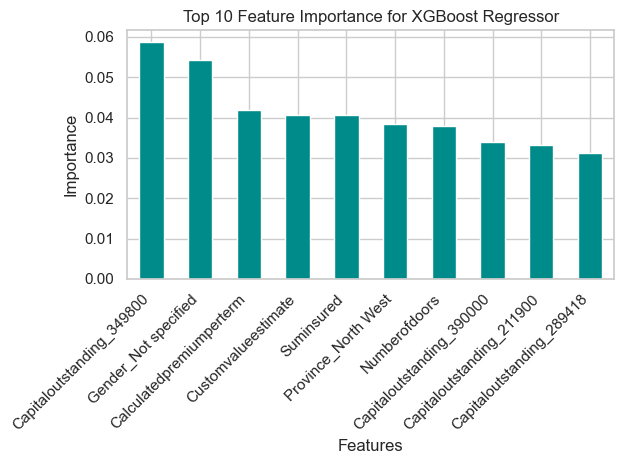

In [14]:
# Cell 2: Run the entire Severity Modeling Pipeline

# Call the method to run the regression model
severity_results = mainAnalysis.run_severity_model()

# Access results if needed, e.g., the best model or feature names
# best_severity_model = severity_results['xgb_model']

In [9]:
print(dataProfile.df.columns)


Index(['Underwrittencoverid', 'Policyid', 'Transactionmonth',
       'Isvatregistered', 'Citizenship', 'Legaltype', 'Title', 'Language',
       'Bank', 'Accounttype', 'Maritalstatus', 'Gender', 'Country', 'Province',
       'Postalcode', 'Maincrestazone', 'Subcrestazone', 'Itemtype', 'Mmcode',
       'Vehicletype', 'Registrationyear', 'Make', 'Model', 'Cylinders',
       'Cubiccapacity', 'Kilowatts', 'Bodytype', 'Numberofdoors',
       'Vehicleintrodate', 'Customvalueestimate', 'Alarmimmobiliser',
       'Trackingdevice', 'Capitaloutstanding', 'Newvehicle', 'Writtenoff',
       'Rebuilt', 'Converted', 'Crossborder', 'Numberofvehiclesinfleet',
       'Suminsured', 'Termfrequency', 'Calculatedpremiumperterm',
       'Excessselected', 'Covercategory', 'Covertype', 'Covergroup', 'Section',
       'Product', 'Statutoryclass', 'Statutoryrisktype', 'Totalpremium',
       'Totalclaims'],
      dtype='object')


In [10]:
dataProfile.df.head()

,Underwrittencoverid,Policyid,Transactionmonth,Isvatregistered,Citizenship,Legaltype,Title,Language,Bank,Accounttype,...,Excessselected,Covercategory,Covertype,Covergroup,Section,Product,Statutoryclass,Statutoryrisktype,Totalpremium,Totalclaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
